In [13]:
# =============================================================================
# Student Details:
# Name: BANKHELE YASH DATTATRAY
# Class: BE Artificial Intelligence and Data Science
# Roll No: 04
# Subject: Machine Learning (ML)
# Practical No: 05 - Ensemble Learning
# Title: Random Forest Classifier for Car Safety Prediction
# =============================================================================

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# Dataset load karo
df = pd.read_csv('car_evaluation.csv')

# Column names add karo (original dataset mein names nahi hai)
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

# Data check karo
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nTarget values distribution:")
print(df['class'].value_counts())

Dataset Shape: (1727, 7)

First 5 rows:
  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    med  unacc
1  vhigh  vhigh     2       2    small   high  unacc
2  vhigh  vhigh     2       2      med    low  unacc
3  vhigh  vhigh     2       2      med    med  unacc
4  vhigh  vhigh     2       2      med   high  unacc

Target values distribution:
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [16]:
# Categorical data ko numerical mein convert karo
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

print("After encoding - First 5 rows:")
print(df.head())

# Features aur target alag karo
X = df.drop('class', axis=1)
y = df['class']

After encoding - First 5 rows:
   buying  maint  doors  persons  lug_boot  safety  class
0       3      3      0        0         2       2      2
1       3      3      0        0         2       0      2
2       3      3      0        0         1       1      2
3       3      3      0        0         1       2      2
4       3      3      0        0         1       0      2


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (1381, 6)
Testing set size: (346, 6)


In [18]:
# Random Forest Model banayo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Model training complete!")

Model training complete!


In [19]:
# Predictions karo
y_pred = model.predict(X_test)

# Accuracy check karo
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Detailed report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.9624

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        77
           1       0.91      0.67      0.77        15
           2       0.99      1.00      0.99       237
           3       0.79      0.88      0.83        17

    accuracy                           0.96       346
   macro avg       0.91      0.87      0.88       346
weighted avg       0.96      0.96      0.96       346



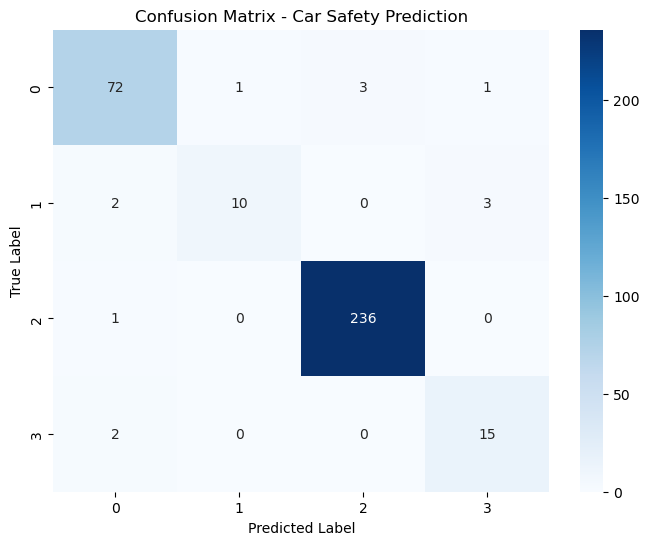

In [20]:
# Confusion Matrix banayo
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Car Safety Prediction')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Feature Importance Ranking:
safety      0.280329
persons     0.228555
buying      0.197642
maint       0.153121
lug_boot    0.079368
doors       0.060984
dtype: float64


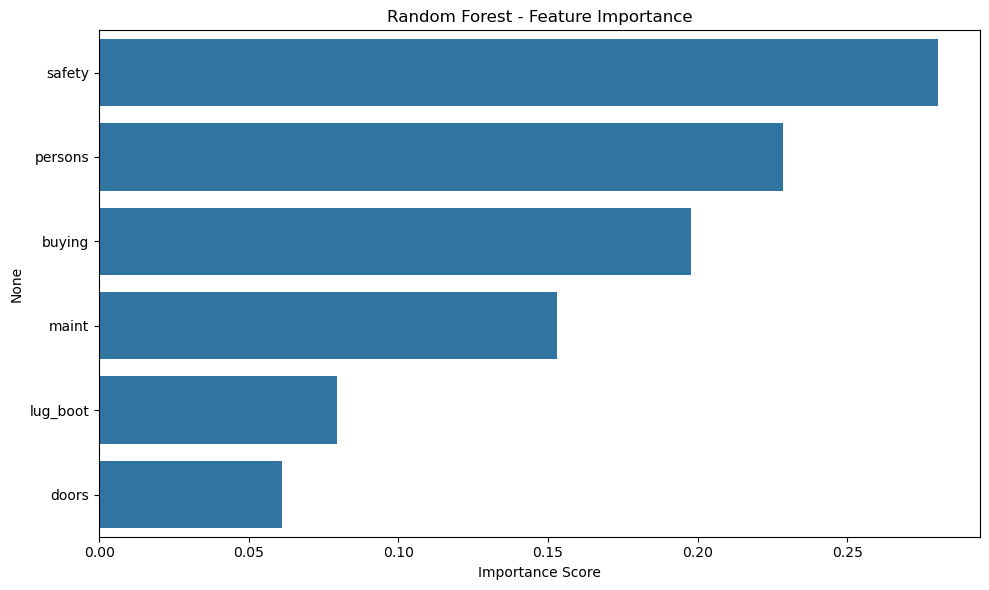

In [21]:
# Feature importance dekho
feature_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance Ranking:")
print(feature_imp)

# Visualize karo
plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title('Random Forest - Feature Importance')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()